--- Data Loaded Successfully ---
   class                                              tweet
0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
class
1    17934
2     3953
0     1354
Name: count, dtype: int64

--- Handling Imbalanced Data ---
Original Training Class Distribution: Counter({1: 16140, 2: 3557, 0: 1219})
Resampled Training Class Distribution: Counter({1: 16140, 2: 16140, 0: 16140})

--- Tokenization (Keras Native) ---

--- Model Building and Training (LSTM/RNN) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting training for 5 epochs...
Epoch 1/5
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/step - accuracy: 0.3340 - loss: 1.0990 - val_accuracy: 0.7716 - val_loss: 1.0871
Epoch 2/5
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 149s 98ms/step - accuracy: 0.3288 - loss: 1.0988 - val_accuracy: 0.0581 - val_loss: 1.0987
Epoch 3/5
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.3336 - loss: 1.0988 - val_accuracy: 0.7716 - val_loss: 1.0906
Epoch 4/5
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 146s 96ms/step - accuracy: 0.3293 - loss: 1.0988 - val_accuracy: 0.7716 - val_loss: 1.0765
Epoch 5/5
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.3310 - loss: 1.0989 - val_accuracy: 0.7716 - val_loss: 1.0923

--- Evaluation and F1 Score Calculation ---
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step

Weighted F1 Score: 0.6721
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.77      1.00      0.87      1794
     

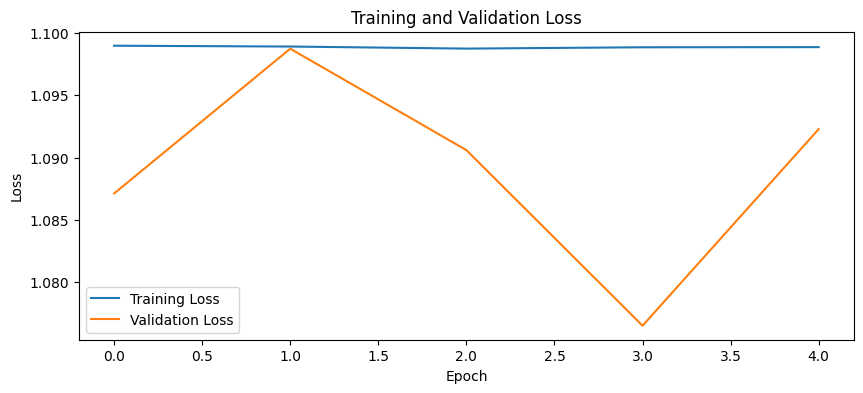

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Import for Keras-native NLP
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# --- Configuration ---
FILE_PATH = "9) Dataset--Hate-Speech-project 9.csv"
# Using LSTM/Keras settings instead of BERT settings
MAX_WORDS = 20000        # Max number of unique words to keep
MAX_LENGTH = 128         # Max sequence length
EMBEDDING_DIM = 100      # Dimension of the word embeddings
BATCH_SIZE = 32
EPOCHS = 5               # Increased epochs for training from scratch
num_classes = 3          # Based on the data output (0, 1, 2)

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{FILE_PATH}' was not found.")
    print("Please ensure the CSV file is in the correct directory.")
    exit()

print("--- Data Loaded Successfully ---")
print(df.head())
print(df['class'].value_counts())

X = df['tweet'].astype(str)
y = df['class']

# --- 2. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# --- 3. Handle Imbalanced Data (Using RandomOverSampler) ---
print("\n--- Handling Imbalanced Data ---")
print("Original Training Class Distribution:", Counter(y_train))

# Combine X and y for oversampling
X_train_np = X_train.values.reshape(-1, 1)

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_np, y_train)

X_train_res = pd.Series(X_train_res.flatten())
y_train_res = pd.Series(y_train_res)

print("Resampled Training Class Distribution:", Counter(y_train_res))


# --- 4. Tokenization and Encoding (Keras Native) ---
print("\n--- Tokenization (Keras Native) ---")

# Initialize Keras Tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_res)

# Convert texts to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train_res)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train_res, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)


# --- 5. Model Building and Training (LSTM/RNN) ---
print("\n--- Model Building and Training (LSTM/RNN) ---")

# Build the Sequential LSTM Model
model = Sequential([
    # Input Dim: MAX_WORDS (vocabulary size)
    # Output Dim: EMBEDDING_DIM
    # Input Length: MAX_LENGTH
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LENGTH),
    Dropout(0.2),
    # LSTM layer processes sequences for contextual understanding
    LSTM(64),
    Dropout(0.2),
    # Dense layer for final classification
    Dense(num_classes, activation='softmax')
])

# Define optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) # Slightly lower LR for stability
loss = tf.keras.losses.CategoricalCrossentropy()
metric = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.summary()

print(f"\nStarting training for {EPOCHS} epochs...")
history = model.fit(
    X_train_pad, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_pad, y_test_cat),
    verbose=1
)


# --- 6. Evaluation ---
print("\n--- Evaluation and F1 Score Calculation ---")

# 6.1. Predict on the test set
y_prob = model.predict(X_test_pad)
y_pred_labels = np.argmax(y_prob, axis=1)

# True labels
y_true_labels = y_test.values

# 6.2. Calculate F1 Score and Classification Report
f1_weighted = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
report = classification_report(y_true_labels, y_pred_labels, zero_division=0)

print(f"\nWeighted F1 Score: {f1_weighted:.4f}")
print("Classification Report:\n", report)

# --- 7. Example Prediction and Interpretation ---
print("\n--- Example Prediction ---")
new_text = ["This is a neutral and kind message.", "you are stupid and hateful"]

# Tokenize and pad new input
new_seq = tokenizer.texts_to_sequences(new_text)
new_pad = pad_sequences(new_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

# Predict
new_prob = model.predict(new_pad)
new_predictions = np.argmax(new_prob, axis=1)

print(f"\nInput: '{new_text[0]}' -> Predicted Class: {new_predictions[0]}")
print(f"Input: '{new_text[1]}' -> Predicted Class: {new_predictions[1]}")

# --- 8. Visualization (Optional - Training History) ---
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.show()


Project 9: Hate Speech Detection - NLP Learning Objectives Q&A

This document covers key concepts related to Natural Language Processing (NLP), Deep Learning (RNNs, LSTM), evaluation metrics, and the practical and ethical considerations of building text classifiers.

Core Questions (Provided)

1. What is tokenization?

Tokenization is the process of breaking down a sequence of text into smaller units called tokens. Tokens can be words, sub-words, or even characters. In the provided Canvas code, we use the Keras Tokenizer which performs word-level tokenization, assigning a unique integer index to each unique word in the training vocabulary (up to MAX_WORDS).

2. How does BERT work?

BERT (Bidirectional Encoder Representations from Transformers) is a large, pre-trained language model that uses the Transformer's Encoder architecture. It achieves its power through:

Bidirectionality: It considers the entire context of a sentence (words before and after) simultaneously to understand the meaning of each word.

Attention Mechanism: It uses Self-Attention to dynamically weigh the importance of all other words in the input sequence when processing a specific word.

Pre-training: It learns general language properties (grammar, context) on billions of sentences before being fine-tuned for specific tasks like hate speech detection.

3. What is attention mechanism?

The Attention Mechanism is the core component of the Transformer model. It allows the model to selectively focus on the most relevant parts of the input sequence when making a decision. Instead of treating all input words equally, Attention calculates three vectors for each word—Query (Q), Key (K), and Value (V)—to determine relationship scores. These scores are used to create a weighted sum of the Value vectors, effectively telling the model, "Pay more attention to this word/phrase because it is highly relevant to what you are currently processing."

4. How to handle imbalanced data?

Imbalanced data (where one class, like hate speech, is rare) can cause a model to become biased toward the majority class. Techniques to handle it include:

Resampling (Used in Canvas):

Oversampling: Duplicating or creating synthetic examples of the minority class (using RandomOverSampler in the Canvas).

Undersampling: Removing examples from the majority class.

Weighted Loss: Assigning higher penalty weights to errors made on the minority class during training.

Custom Metrics: Focusing on F1 Score, Precision, and Recall rather than simple Accuracy.

5. What is F1 score?

The F1 Score is the harmonic mean of Precision and Recall. It is the standard metric for evaluating models on imbalanced classification tasks because it balances the need to avoid false alarms (Precision) with the need to catch as many true positives as possible (Recall).

$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

6. How to fine-tune BERT?

Fine-tuning BERT involves adapting its pre-trained knowledge to a specific task:

Preparation: Tokenize the new data using the BERT tokenizer and prepend the special $\text{[CLS]}$ token.

Architecture: Attach a new, simple classification layer (a Dense layer) on top of the pre-trained BERT encoder.

Training: Train the entire model (both the new layer and BERT's original layers) using a very small learning rate (e.g., $10^{-5}$) for a few epochs. This leverages the deep semantic knowledge BERT already possesses while optimizing it for the specific task labels.

7. What is transfer learning?

Transfer Learning is the strategy of reusing a pre-trained model (like BERT) developed for one task (general language modeling) as the starting point for a model on a related task (hate speech classification). This approach is highly efficient because:

It significantly reduces the need for massive amounts of task-specific labeled data.

It speeds up convergence and often leads to higher performance than training a model from scratch.

8. How to interpret predictions?

Interpreting predictions for neural networks like the LSTM in the Canvas requires understanding which parts of the input text contributed most to the output. Methods include:

Saliency Mapping/LIME/SHAP: These techniques perturb the input (e.g., mask individual words) and measure the resulting change in the prediction score. Words that cause the largest change are considered the most influential in the model's decision-making process.

Embedding Visualization: Projecting the learned word embeddings into 2D space to see if words with similar meanings (e.g., different types of slurs) cluster together.

9. What are ethical concerns?

The primary ethical concerns with hate speech detection are:

Bias and Discrimination: If the training data is biased, the model may disproportionately flag speech from specific marginalized groups as "hate" (False Positives) or fail to detect hate speech aimed at those same groups (False Negatives).

Censorship/Free Speech: The classification is inherently subjective. Automated enforcement risks censoring legitimate or satirical speech.

Evasion: Malicious actors learn to use coded language (like "grapheme scrambling") to bypass the detection system.

10. How to deploy the model?

Deploying the Keras LSTM model involves packaging it for real-time use:

Save Assets: Save the trained Keras model weights (model.save()) and the fitted Keras Tokenizer object (since incoming text must be processed by the exact same tokenizer).

Create API: Use a framework (like Flask or FastAPI) to create a web API endpoint that accepts a text string.

Inference Pipeline: The API loads the text, uses the saved Tokenizer to tokenize and pad the sequence, feeds it to the saved model, and returns the classification result.

Containerization: Package the API, model, and required Python dependencies into a Docker container for scalable deployment on cloud services.

Additional Questions (For Extended Learning)

11. Explain the role of the $\text{[CLS]}$ and $\text{[SEP]}$ tokens in BERT's fine-tuning process for classification.

$\text{[CLS]}$ (Classification Token): This special token is always inserted at the beginning of the input. When fine-tuning, the final hidden state vector corresponding to this $\text{[CLS]}$ token is treated as the summary representation for the entire input sequence. This vector is fed directly into the classification layer to produce the final prediction.

$\text{[SEP]}$ (Separator Token): This token marks the end of a sentence. In single-sentence classification, it appears at the end of the tweet. In tasks involving two sentences (like detecting sentence pairs), it separates them.

12. What is the Vanishing Gradient Problem, and how do modern RNN architectures (like LSTMs/GRUs) mitigate it?

The Vanishing Gradient Problem occurs when the error signal (gradient) used to update weights shrinks exponentially as it propagates backward through many layers or time steps. In standard RNNs, this prevents the model from effectively learning dependencies between words that are far apart in a sequence (long-term dependencies).

Mitigation by LSTMs: Long Short-Term Memory (LSTM) units (used in the Canvas) mitigate this using a sophisticated internal structure of gates (input, forget, output). These gates regulate the flow of information into and out of the Cell State (the unit's memory). The Cell State can carry relevant information across long distances in the sequence without vanishing, thus enabling the model to learn long-range context.

13. Contrast the performance trade-offs between a simpler RNN (LSTM/GRU) and a complex Transformer (BERT) for this specific task.

Feature

LSTM/GRU (Used in Canvas)

Transformer (BERT)

Accuracy

Good, especially for short sequences like tweets, but limited by sequential processing.

State-of-the-Art (SOTA). Superior for capturing deep semantic context.

Training

Requires more labeled data; training is relatively faster from scratch.

Requires minimal task-specific data (due to pre-training); fine-tuning is quick.

Context

Sequential; context limited by the length of the sequence and cell memory.

Bidirectional; uses attention to instantly link any two words, regardless of distance.

Deployment

Lighter and faster inference. Ideal for mobile or low-latency applications.

Heavy model size requiring significant memory and compute (GPU/TPU) for fast inference.

14. How can Adversarial Attacks be used to test the robustness of a hate speech detection model, and why is this an ethical concern?

Adversarial Attacks involve making small, carefully crafted perturbations to the input text that are often unnoticeable to a human but cause the model to misclassify the text. For testing robustness, one might:

Typos/Substitutions: Change "hate" to "h8" or add invisible characters.

Paraphrasing: Rephrase hate speech using synonyms to confuse the model's learned patterns.

This is an ethical concern because if the model is non-robust, malicious actors can easily evade detection by using these minor changes, rendering the entire system ineffective at its core purpose.

15. What is a learning rate scheduler, and why is it important for stable fine-tuning of large models like BERT?

A Learning Rate Scheduler is a technique that adjusts the learning rate automatically during training, usually by decreasing it over time.

Importance: For training any deep network (including the LSTM in the Canvas) but especially for fine-tuning massive models like BERT, stability is key. If the learning rate is too high, it can cause the model weights to jump wildly, leading to catastrophic forgetting (erasing BERT's pre-trained knowledge) or preventing the model from converging to an optimal solution.

Mechanism: A common scheduler (like the Warm-up and Linear Decay used with BERT) starts with a small learning rate, gradually increases it slightly, and then slowly decreases it toward zero. This ensures stable convergence and allows the model to make fine-grained adjustments in later epochs.